# Zeds - Only good to you dead
#### Justin Butler
##### November 2017

## Zombie Model
Preliminary research on the zombie outbreak has shown that earlier voodoo style models have been inaccurate. The spread seems to more closely model that of a disease, perhaps a parasite, and therefore different differential equations will be used to describe the impact of this disease on humanity as a whole.
\begin{alignat}{4}
\frac{dS}{dt}&=\pi S - \beta S Z - \delta S&\qquad& (1)\\
\frac{dZ}{dt}&=\beta S Z - \alpha S Z&\qquad& (2)\\
\frac{dR}{dt}&=\delta S + \alpha S Z&\qquad& (3)
\end{alignat}
Equation (1) models human growth and decay. This equation is unchanged from the previous model. It models the birth rate, $\pi S$, the rate that humans will turn into zombies after a human-zombie interaction, $\beta S Z$, and the rate of natural death, $\delta S$.

Equation (2) models zombie growth and decay. Notice that there are no terms in this equation that do not rely on $Z$. Therefore, in order for a zombie outbreak to commence, there must be at least one zombie at the start. From there the equation models the creation of new zombies from interactions with humans, $\beta S Z$, and the destruction of zombies by humans, $\alpha S Z$.

Notice that in equation (3), the actual number of dead is never accounted for. The equation models the number of humans dying of natural causes, $\delta S$, and the number of zombies killed by humans $\alpha S Z$. However, the number of truly dead entities, R, is never used in any of these equations. Therefore, the third equation will be ommitted in the following analysis.
### Modeling Assumptions
There will be two key modeling assumptions. First, that the population of humans will be negligibly impacted by new births and natural deaths. Therefore, $\pi = \delta = 0$.

The second assumption will have two different possibilities. The assumption is that either humans are the better fighters or zombies are the better fighters. The parameters $\alpha$ and $\beta$ will simulate the approximate "skill" of humans and zombies respectively. The first version of the model that will be used is $\alpha > \beta$, that is, humans are more skilled fighters than zombies. The second version of the model that will be used is $\beta > \alpha$, that is, zombies are more skilled fighters than zombies. For the purposes of these models: $\beta = 0.0095$ and $\alpha = \beta\pm 0.0001$. 


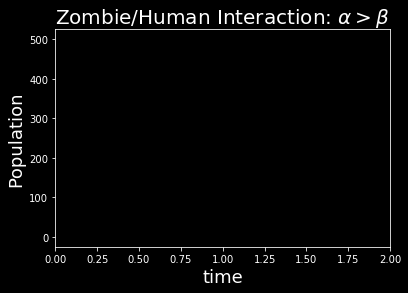

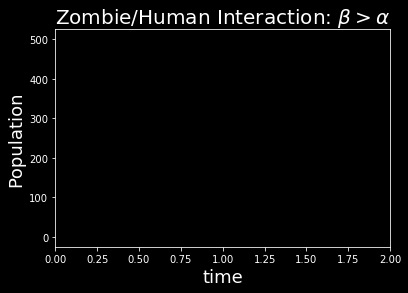

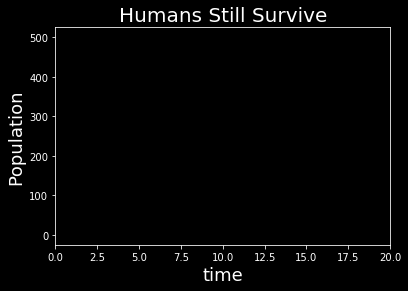

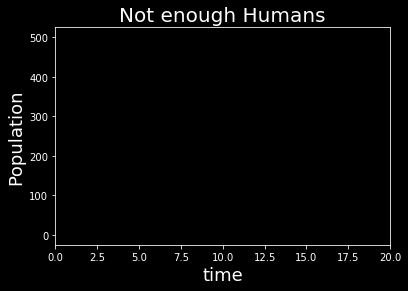

In [62]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
plt.style.use('dark_background')

#--------------------------------------------------
# Define the Differential Equation
#--------------------------------------------------
def ZombDiff(xx,t,a,b,d,p):
    hum = xx[0]
    zom = xx[1]
    humP = p*hum - b*hum*zom - d*hum
    zomP = b*hum*zom - a*hum*zom
    return np.array([humP, zomP])

#--------------------------------------------------
# Declare the variables and an array:
#      ah: Humans Better   az: Zombies Better
#--------------------------------------------------
ah = 0.06
az = 0.04
an = 0.051
ae = 0.0501
bh = 0.04
bz = 0.06
bn = 0.049
be = 0.0499
d = 0
p = 0

para = np.array([[ah,az,an,ae],[bh,bz,bn,be]])

#--------------------------------------------------
# Plot the graph!
#--------------------------------------------------
trange = np.linspace(0,20,10000)

''' The graphing process is done with a short loop. Since most of the parameters remain the same between the two models,
I elected to make a for loop that would create first the graph where humans are better fighters and then the graph where
zombies are the better fighters. This is done by calling specific terms of the array "para" as declared above in the 
"Declare the variables and an array" section.
'''

for i in range(4):
    xsoln = odeint(ZombDiff, [500,10], trange, (para[0,i],para[1,i],d,p))
    fig=plt.figure()
    #plt.plot(trange, xsoln[:,0],  linestyle='--', label="Humans", color='#96FDFE')
    #plt.plot(trange, xsoln[:,1], label="Zeds", color='#FCFE96')
    plt.ylabel("Population", fontsize='18')
    plt.legend(fontsize='12')
    plt.xlabel("time", fontsize='18')
    plt.ylim(-25,525)
    if i==0:
        plt.title(r"Zombie/Human Interaction: $\alpha > \beta$", fontsize='20')
        plt.xlim(0,2)
        plt.savefig('humWinBlank.png')
    if i==1:
        plt.title(r"Zombie/Human Interaction: $\beta > \alpha$", fontsize='20')
        plt.xlim(0,2)
        plt.savefig('zombWinBlank.png')
    if i==2:
        plt.title(r"Humans Still Survive", fontsize='20')
        plt.xlim(0,20)
        plt.savefig('justEnoughBlank.png')
    if i==3:
        plt.title(r"Not enough Humans", fontsize='20')
        plt.xlim(0,20)
        plt.savefig('notEnoughBlank.png')
    plt.show()
    plt.close()

#### Analysis
It can be seen that when Zombies are the better fighters, even by a small margin, humans are completely exterminated. If humans are the better fighters then eventually they will be able to eliminate the zombie threat (though taking losses in the process). 

First, we will want to find equilibrium solutions to these differentials. For equation (1), the equilibrium solution is:

\begin{alignat}{4}
0 &= \pi S - \beta S Z - \delta S&&\\
&= S(\pi-\beta Z - \delta) \qquad (4)\\
\end{alignat}

Which implies that either $S = 0$ or $Z = \frac{\pi - \delta}{\beta}$. Recall that one of our assumptions is that $\pi=\delta=0$. Therefore the equilibrium value for $Z$ using that assumption is $Z=0$.

For equation (2), the equilibrium solution is:

\begin{alignat}{4}
0 &= \beta S Z - \alpha S Z&&\\
&=S Z (\beta - \alpha)\qquad&(5)
\end{alignat}

Which implies that either $S = 0$ or $Z = 0$. Thus, equilibrium when either the zombie population is zero, the human population is zero, or when both are zero. Since the outcome where both populations are zero is not very interesting (everything is dead) only the two non-trivial equilibria will be considered for furthered analysis.

Determining whether these equilibrium solutions are stable requires the use of a Jacobian. Taking the partial derivitives of both equations with respect both S and Z we obtain the following matrix (note that $\pi$ and $\delta$ both equal $0$):

\begin{align}
J=\begin{bmatrix}
-\beta Z & -\beta S\\
\beta Z - \alpha Z & \beta S - \alpha S
\end{bmatrix}
\end{align}

###### First Equilibria: $S\neq 0$
If $S\neq0$ then there is some natural number $N$ such that $S=N$. Substituting $N$ for $S$ and $0$ for $Z$ into the Jacobian the following matrix is obtained:

\begin{bmatrix}
0 & -\beta N\\
0 & (\beta - \alpha) N
\end{bmatrix}

From this matrix one can find the Eigen values by taking the determinant of the following matrix:

\begin{align}
det\begin{bmatrix} 0-\lambda & -\beta N\\ 0 & (\beta - \alpha)-\lambda N \end{bmatrix}&\\
= \lambda\left[(\beta-\alpha) N - \lambda\right] & \qquad (6)
\end{align}

This has solutions $\lambda = 0, (\beta-\alpha)N$. Notice that if $\beta>\alpha$, the second solution for $\lambda$ is positive and therefore the equilibrium is unstable. If, however, $\alpha>\beta$ then the second solution is negative and could possibly be stable. And indeed, as seen above, the human population can survive when $\alpha>\beta$.

However, if in the example and graph above there had only been a starting population of 50 humans then all of the humans would have died out. This means that the stability of this equilibrium solution is dependent on the starting conditions.
###### Second Equilibria: $Z \neq 0$
If $Z\neq 0$ then there is some natural number $N$ such that $Z=N$. Substituting $N$ for $Z$ and $0$ for $S$ into the Jacobian the following matrix is obtained:

\begin{bmatrix}
-\beta Z & 0\\
(\beta-\alpha)N & 0
\end{bmatrix}

From this matrix one can find the Eigen values by taking the determinant of the following matrix:

\begin{align}
det\begin{bmatrix}
-\beta Z -\lambda & 0\\
(\beta-\alpha)N & -\lambda
\end{bmatrix} &\\
= \lambda(\beta Z +\lambda) & \qquad (7)
\end{align}

This has solutions $\lambda = 0, -\beta Z$. Since $\beta\geq0$, this equilibrium solution is possibly stable.
